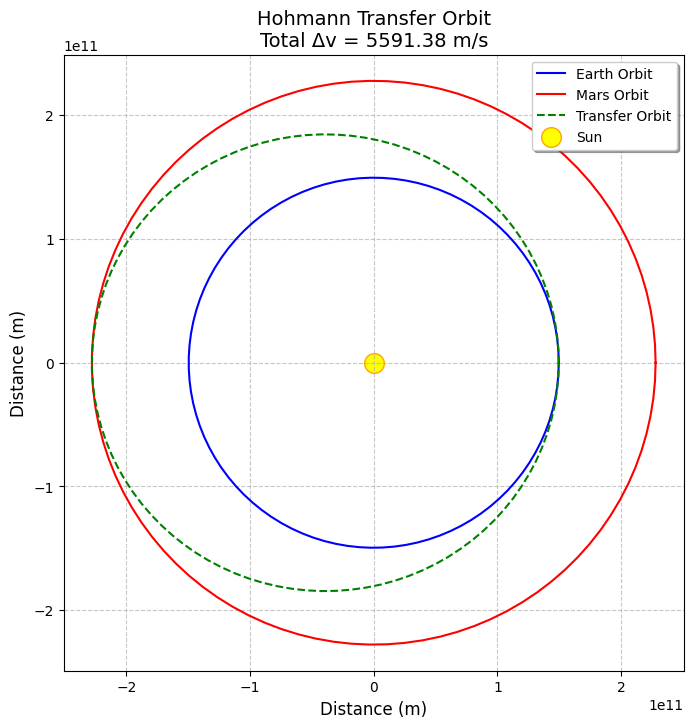

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_hohmann_transfer(earth_orbit_radius, mars_orbit_radius):
    """
    Calculate the delta-v (velocity change) required for a Hohmann transfer orbit from Earth to Mars.

    Parameters:
    - earth_orbit_radius (float): Radius of Earth's orbit around the Sun in meters.
    - mars_orbit_radius (float): Radius of Mars's orbit around the Sun in meters.

    Returns:
    - delta_v_earth (float): Delta-v required to escape Earth's orbit and enter the transfer orbit.
    - delta_v_mars (float): Delta-v required to enter Mars's orbit from the transfer orbit.
    - total_delta_v (float): Total delta-v for the entire transfer.
    """
    
    # Gravitational constant for the Sun in m^3/s^2
    mu_sun = 1.32712440018e20

    # Calculate orbital velocities of Earth and Mars using circular orbit approximation
    v_earth = np.sqrt(mu_sun / earth_orbit_radius)  # Velocity of Earth in its orbit
    v_mars = np.sqrt(mu_sun / mars_orbit_radius)    # Velocity of Mars in its orbit
    
    # Calculate the semi-major axis of the Hohmann transfer orbit (average distance between Earth and Mars)
    transfer_orbit_semi_major_axis = (earth_orbit_radius + mars_orbit_radius) / 2

    # Calculate the velocity required at Earth's position for the transfer orbit
    v_transfer_at_earth = np.sqrt(2 * mu_sun / earth_orbit_radius - mu_sun / transfer_orbit_semi_major_axis)
    
    # Calculate the velocity required at Mars's position for the transfer orbit
    v_transfer_at_mars = np.sqrt(2 * mu_sun / mars_orbit_radius - mu_sun / transfer_orbit_semi_major_axis)

    # Delta-v at Earth: difference between the transfer orbit velocity and Earth's orbital velocity
    delta_v_earth = v_transfer_at_earth - v_earth
    
    # Delta-v at Mars: difference between Mars's orbital velocity and the transfer orbit velocity at Mars
    delta_v_mars = v_mars - v_transfer_at_mars
    
    # Total delta-v required for the Hohmann transfer (sum of absolute delta-v values at Earth and Mars)
    total_delta_v = abs(delta_v_earth) + abs(delta_v_mars)

    return delta_v_earth, delta_v_mars, total_delta_v

# Parameters
earth_orbit_radius = 1.496e11  # Radius of Earth's orbit in meters
mars_orbit_radius = 2.279e11   # Radius of Mars's orbit in meters
delta_v_earth, delta_v_mars, total_delta_v = calculate_hohmann_transfer(earth_orbit_radius, mars_orbit_radius)

# Generate coordinates for Earth's and Mars's orbits
theta = np.linspace(0, 2 * np.pi, 100)
earth_orbit_x = earth_orbit_radius * np.cos(theta)
earth_orbit_y = earth_orbit_radius * np.sin(theta)
mars_orbit_x = mars_orbit_radius * np.cos(theta)
mars_orbit_y = mars_orbit_radius * np.sin(theta)

# Transfer orbit parameters
a_transfer = (earth_orbit_radius + mars_orbit_radius) / 2  # Semi-major axis of transfer orbit
e_transfer = (mars_orbit_radius - earth_orbit_radius) / (earth_orbit_radius + mars_orbit_radius)  # Eccentricity

# Generate coordinates for the Hohmann transfer orbit
transfer_orbit_x = a_transfer * (np.cos(theta) - e_transfer)
transfer_orbit_y = a_transfer * np.sqrt(1 - e_transfer**2) * np.sin(theta)

# Plot the orbits and the transfer path
plt.figure(figsize=(8, 8))
plt.plot(earth_orbit_x, earth_orbit_y, label="Earth Orbit", color="blue", linestyle="-")
plt.plot(mars_orbit_x, mars_orbit_y, label="Mars Orbit", color="red", linestyle="-")
plt.plot(transfer_orbit_x, transfer_orbit_y, '--', label="Transfer Orbit", color="green")
plt.scatter([0], [0], color="yellow", s=200, edgecolor="orange", label="Sun")

# Plot styling
plt.legend(loc="upper right", frameon=True, shadow=True)
plt.title(f"Hohmann Transfer Orbit\nTotal Δv = {total_delta_v:.2f} m/s", fontsize=14)
plt.xlabel("Distance (m)", fontsize=12)
plt.ylabel("Distance (m)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.axis("equal")

plt.show()


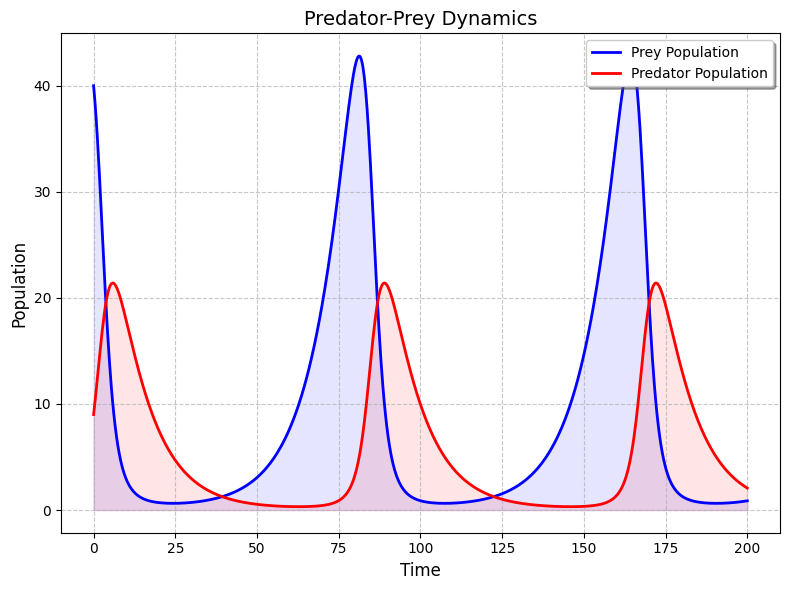

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the predator-prey system as a system of differential equations
def predator_prey_system(populations, t, alpha, beta, delta, gamma):
    """
    Calculate the rate of change for prey and predator populations based on Lotka-Volterra equations.

    Parameters:
    - populations (list): A list with two elements: [prey, predator] populations at time t.
    - t (float): Time variable, required for odeint even though it's unused here.
    - alpha (float): Prey growth rate.
    - beta (float): Rate at which predators consume prey.
    - delta (float): Predator growth rate from consuming prey.
    - gamma (float): Natural predator death rate.

    Returns:
    - list: Contains the rate of change [dprey_dt, dpredator_dt] for prey and predator populations.
    """
    prey, predator = populations  # Unpack the populations array into prey and predator variables
    dprey_dt = alpha * prey - beta * prey * predator  # Rate of change for prey
    dpredator_dt = delta * prey * predator - gamma * predator  # Rate of change for predator
    return [dprey_dt, dpredator_dt]

# Parameters for the system
alpha = 0.1            # Prey growth rate
beta = 0.02            # Rate at which predators consume prey
delta = 0.01           # Rate at which prey consumption converts into predator growth
gamma = 0.1            # Predator death rate
prey_initial = 40      # Initial population of prey
predator_initial = 9   # Initial population of predators
time = np.linspace(0, 200, 1000)  # Time points for simulation from 0 to 200 in 1000 steps

# Solve the differential equations using the initial conditions and parameters
initial_conditions = [prey_initial, predator_initial]
solution = odeint(predator_prey_system, initial_conditions, time, args=(alpha, beta, delta, gamma))

# Plotting the predator and prey populations over time
plt.figure(figsize=(8, 6))
plt.plot(time, solution[:, 0], label="Prey Population", color="blue", linestyle="-", linewidth=2)
plt.plot(time, solution[:, 1], label="Predator Population", color="red", linestyle="-", linewidth=2)
plt.fill_between(time, solution[:, 0], color="blue", alpha=0.1)
plt.fill_between(time, solution[:, 1], color="red", alpha=0.1)

# Add legend, labels, and grid for clarity
plt.legend(loc="upper right", frameon=True, shadow=True)
plt.title("Predator-Prey Dynamics", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

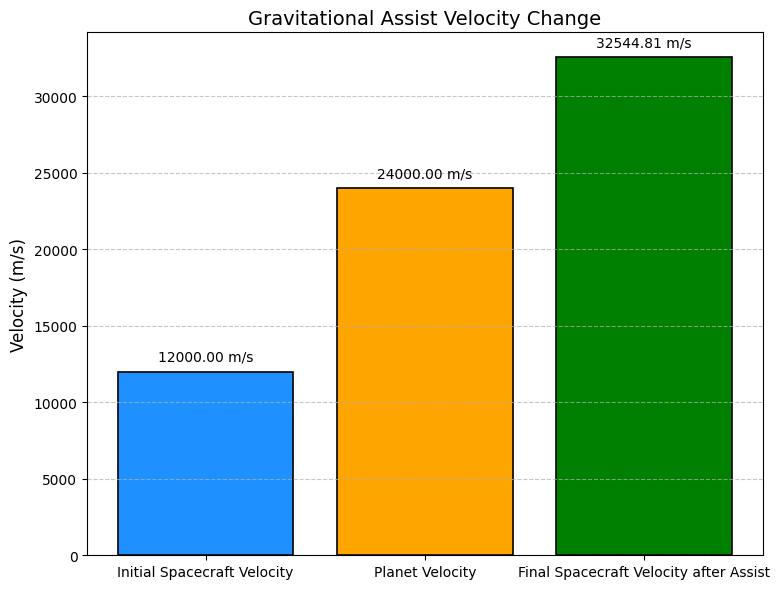

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the final velocity of a spacecraft after gravitational assist
def gravitational_assist(spacecraft_velocity, planet_velocity, planet_mass, closest_approach_distance):
    """
    Calculate the final velocity of a spacecraft after a gravitational assist with a planet.

    Parameters:
    - spacecraft_velocity (float): Initial velocity of the spacecraft in m/s.
    - planet_velocity (float): Velocity of the planet in m/s.
    - planet_mass (float): Mass of the planet in kg.
    - closest_approach_distance (float): Distance of closest approach in meters.

    Returns:
    - v_final (float): The spacecraft's final velocity after the gravitational assist.
    """
    G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2

    # Relative initial velocity between the spacecraft and the planet
    v_rel_initial = abs(spacecraft_velocity - planet_velocity)
    
    # Calculate velocity at infinity (far from the planet) after gravitational interaction
    v_inf = np.sqrt(v_rel_initial**2 + 2 * G * planet_mass / closest_approach_distance)
    
    # Calculate final velocity considering energy changes from the approach and assist
    v_final = np.sqrt(spacecraft_velocity**2 + 2 * (v_inf**2 - spacecraft_velocity * v_inf * np.cos(np.pi)))
    
    return v_final

# Define initial parameters for the gravitational assist scenario
spacecraft_velocity = 1.2e4  # Initial velocity of the spacecraft in m/s
planet_velocity = 2.4e4      # Velocity of the planet in m/s
planet_mass = 5.972e24       # Mass of the planet, assuming Earth, in kg
closest_approach_distance = 6.7e6  # Closest approach distance in meters

# Compute the final velocity after gravitational assist
v_final = gravitational_assist(spacecraft_velocity, planet_velocity, planet_mass, closest_approach_distance)

# Prepare data for plotting
velocities = [spacecraft_velocity, planet_velocity, v_final]  # List of velocities to display
labels = ["Initial Spacecraft Velocity", "Planet Velocity", "Final Spacecraft Velocity after Assist"]  # Labels for each bar
colors = ["dodgerblue", "orange", "green"]  # Colors for each bar

# Plot the velocities as a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
bars = plt.bar(labels, velocities, color=colors, edgecolor="black", linewidth=1.2)  # Create bars with edge styling
plt.ylabel("Velocity (m/s)", fontsize=12)  # Label the y-axis
plt.title("Gravitational Assist Velocity Change", fontsize=14)  # Title of the plot

# Add velocity values on top of each bar for clarity
for bar, velocity in zip(bars, velocities):
    yval = bar.get_height()  # Get the height of each bar to place text
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f"{yval:.2f} m/s", ha="center", va="bottom", fontsize=10)

# Add a grid for the y-axis and adjust layout for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Grid with dashed lines for the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

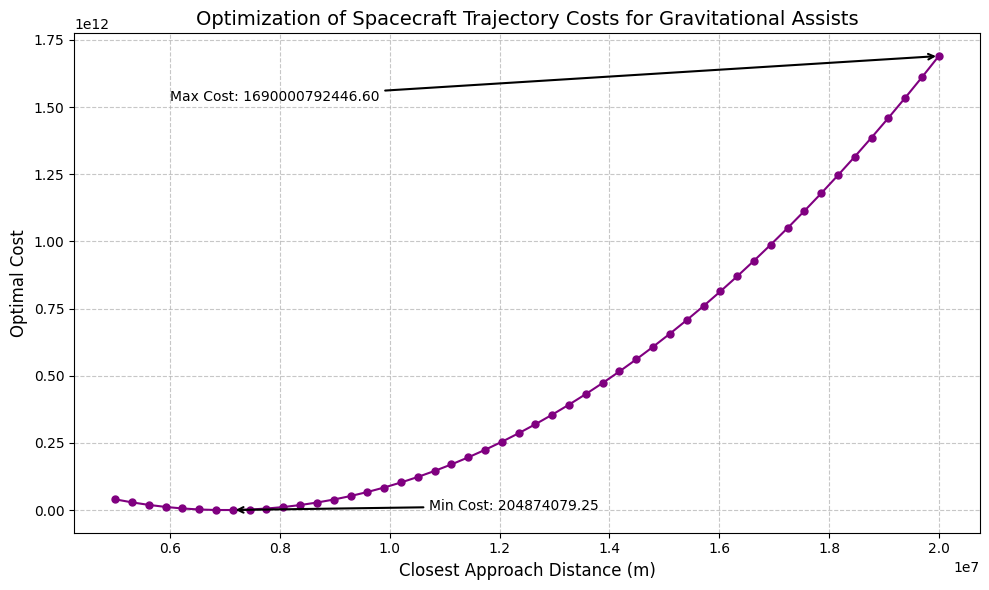

In [33]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# Function to optimize the spacecraft's trajectory based on fuel efficiency and gravitational assist
def optimize_trajectory(fuel_mass, initial_thrust, closest_approach):
    """
    Objective function for trajectory optimization using gravitational assist.

    Parameters:
    - fuel_mass (float): Total mass of fuel onboard in kg.
    - initial_thrust (float): Initial thrust in Newtons.
    - closest_approach (float): Closest approach distance to the celestial body in meters.

    Returns:
    - Optimal parameters (list): [time, thrust] values that minimize the cost function.
    - Cost (float): Minimized cost function value.
    """
    
    # Define the cost function for optimization
    def objective(params):
        time, thrust = params  # Unpack parameters: time and thrust
        
        # Calculate delta-v (velocity change) based on thrust and time
        delta_v = thrust * time / fuel_mass
        
        # Calculate the effect of gravitational assist based on closest approach distance
        gravitational_assist_effect = np.log(closest_approach) if closest_approach > 1 else 0
        
        # Simulate distance traveled using delta-v and gravitational effect
        distance_traveled = delta_v * time * gravitational_assist_effect / 2

        # Calculate the cost considering fuel usage, time penalty, and gravitational assist efficiency
        fuel_used = fuel_mass - (thrust * time) / delta_v
        time_penalty = 0.05 * time**1.2  # Small non-linear penalty for extended time
        efficiency_penalty = 0.01 * (closest_approach - 7e6)**2  # Optimal closest approach is around 7 million meters
        
        # Total cost combines all penalties and fuel usage
        cost = fuel_used + time_penalty + efficiency_penalty
        return cost

    # Initial guess for time and thrust
    initial_guess = [1e6, initial_thrust]
    
    # Define bounds for time and thrust to avoid unrealistic values
    bounds = [(1e5, 1e7), (5000, 3e5)]
    
    # Minimize the objective function to find the optimal time and thrust
    result = minimize(objective, initial_guess, bounds=bounds)
    return result.x, result.fun  # Return optimal parameters and the minimized cost

# Parameters for the optimization
fuel_mass = 500000  # Fuel mass in kg
initial_thrust = 20000  # Initial thrust in Newtons
closest_approach_distances = np.linspace(5e6, 2e7, 50)  # Range of distances to visualize costs
optimal_costs = []

# Compute optimal cost for each closest approach distance
for closest_approach in closest_approach_distances:
    _, cost = optimize_trajectory(fuel_mass, initial_thrust, closest_approach)
    optimal_costs.append(cost)

# Plotting the results to observe optimal closest approach distances
plt.figure(figsize=(10, 6))
plt.plot(closest_approach_distances, optimal_costs, color="purple", linestyle="-", marker='o', markersize=5)
plt.xlabel("Closest Approach Distance (m)", fontsize=12)
plt.ylabel("Optimal Cost", fontsize=12)
plt.title("Optimization of Spacecraft Trajectory Costs for Gravitational Assists", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)

# Identify and annotate the minimum and maximum cost points
min_cost_index = np.argmin(optimal_costs)
max_cost_index = np.argmax(optimal_costs)

# Annotate minimum cost on the plot
plt.annotate(f'Min Cost: {optimal_costs[min_cost_index]:.2f}', 
             xy=(closest_approach_distances[min_cost_index], optimal_costs[min_cost_index]), 
             xytext=(closest_approach_distances[min_cost_index] * 1.5, optimal_costs[min_cost_index] * 1),
             arrowprops=dict(arrowstyle='->', lw=1.5), fontsize=10)

# Annotate maximum cost on the plot
plt.annotate(f'Max Cost: {optimal_costs[max_cost_index]:.2f}', 
             xy=(closest_approach_distances[max_cost_index], optimal_costs[max_cost_index]), 
             xytext=(closest_approach_distances[max_cost_index] * 0.3, optimal_costs[max_cost_index] * 0.9),
             arrowprops=dict(arrowstyle='->', lw=1.5), fontsize=10)

plt.tight_layout()  # Adjust layout for clarity
plt.show()  # Display the plot